In [1]:
import pandas as pd
# Import Tensorflow & Pathlib librairies
import tensorflow as tf 
import pathlib 
import pandas as pd 
import plotly.express as px
import os
import io
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Deep+Learning/project/spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
print("Percentage of missing values: ")
display(100 * df.isnull().sum() / df.shape[0])

Percentage of missing values: 


v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [5]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

The last 3 columns contain more than 99% missing values, we can exclude them. The first column 'v1' has 2 possible values, spam or no spam (ham) and the second 'v2' corresponds to the texts received by users that are to be categorized either as spam or ham.

In [6]:
dataset = df.iloc[:,:2]

In [7]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
dataset['v2'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [9]:
dataset.shape

(5572, 2)

In [10]:
dataset['v1'].value_counts().values

array([4825,  747], dtype=int64)

In [11]:
dataset['v1'].value_counts().index

Index(['ham', 'spam'], dtype='object')

# Visualisation :

In [13]:
fig_target =  px.pie(dataset, values= dataset['v1'].value_counts().values, names=dataset['v1'].value_counts().index, title = 'Spam proportion', width = 500, height = 400)
fig_target.update(layout=dict(title=dict(x=0.5)))
fig_target.show()

# Preprocessing for nlp : 

In [16]:
!pip install spacy

     --------------------------------------- 12.2/12.2 MB 18.7 MB/s eta 0:00:00
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
     ------------------------------------- 480.9/480.9 kB 15.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 23.1 MB/s eta 0:00:00
     ---------------------------------------- 94.7/94.7 kB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB ? eta 0:00:00
     ------------------------------------- 181.6/181.6 kB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 25.0 MB/s eta 0:00:00


In [17]:
!python -m spacy download fr_core_news_sm

     --------------------------------------- 16.3/16.3 MB 19.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


# Eliminating non alphanumeric caracters, Lemmatization & Tokenization

In [18]:
import fr_core_news_sm
nlp = fr_core_news_sm.load()

In [19]:
from spacy.lang.fr.stop_words import STOP_WORDS

In [20]:
dataset["txt_clean"] = dataset["v2"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" " or ch=="'"))
dataset["txt_clean"] = dataset["txt_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
dataset["txt_clean"] = dataset["txt_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) and (token.text not in STOP_WORDS)]))

In [21]:
dataset.head()

,v1,v2,txt_clean
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy availabl only in b...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah don' t think he goe to usf h live around h...


In [22]:
import numpy as np
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token="out_of_vocab") # instanciate the tokenizer
tokenizer.fit_on_texts(dataset.txt_clean)
dataset["txt_encoded"] = tokenizer.texts_to_sequences(dataset.txt_clean)

In [23]:
dataset.head()

,v1,v2,txt_clean,txt_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy availabl only in b...,"[42, 448, 1, 417, 692, 693, 63, 7, 1, 104, 115..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[45, 316, 1, 389, 5, 1]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 wkly comp to win fa cup final ...,"[47, 464, 7, 18, 732, 874, 2, 170, 1, 1, 612, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[5, 230, 118, 20, 365, 1, 5, 145, 142, 59, 118]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah don' t think he goe to usf h live around h...,"[925, 89, 28, 91, 66, 480, 2, 875, 1, 255, 202..."


In [24]:
dataset['target'] = 0

In [25]:
dataset.loc[dataset['v1'] == 'spam',['target']] = 1

In [26]:
dataset['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

In [18]:
spam_dict = dataset['target'].value_counts().to_dict()

In [19]:
spam_dict

{0: 4825, 1: 747}

In [20]:
target_dict = {}
for i, el in spam_dict.items():
  el = 1 / (el / dataset['target'].value_counts().sum()) / 5
  col = {i: el}
  target_dict.update(col)

In [21]:
target_dict

{0: 0.23096373056994818, 1: 1.491834002677376}

In [22]:
dataset.head()

,v1,v2,txt_clean,txt_encoded,target
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy availabl only in b...,"[42, 446, 1, 402, 698, 669, 63, 7, 1, 88, 115,...",0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[44, 310, 1, 414, 5, 1]",0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 wkly comp to win fa cup final ...,"[46, 464, 7, 18, 735, 872, 2, 170, 1, 1, 617, ...",1
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[5, 230, 108, 20, 358, 1, 5, 161, 143, 58, 108]",0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah don' t think he goe to usf he live around ...,"[924, 90, 28, 96, 67, 465, 2, 873, 67, 251, 20...",0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
txt_pad = tf.keras.preprocessing.sequence.pad_sequences(dataset["txt_encoded"], padding="post")

In [25]:
xtrain, xval, ytrain, yval = train_test_split(txt_pad, dataset['target'], test_size=0.3)

In [26]:
train = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
val = tf.data.Dataset.from_tensor_slices((xval, yval))
train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

In [27]:
for txt, target in train_batch.take(1):
  print(txt, target)

tf.Tensor(
[[752   1 405 ...   0   0   0]
 [ 81 860   1 ...   0   0   0]
 [ 34 983   2 ...   0   0   0]
 ...
 [ 46 398 330 ...   0   0   0]
 [862  37   1 ...   0   0   0]
 [217   8 123 ...   0   0   0]], shape=(64, 164), dtype=int32) tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0], shape=(64,), dtype=int64)


In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import re
import shutil
import string
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU

In [30]:
embedding_dim=8

vocab_size = tokenizer.num_words # the number of words in the vocabulary
model = Sequential([
  Embedding(vocab_size+1, embedding_dim, input_shape=[txt.shape[1],], name="embedding"), # the embedding layer
  # the input dim needs to be equal to the size of the vocabulary + 1 (because of
  # the zero padding)
  GlobalAveragePooling1D(), # this will pick the average for every word in the sentence
  # along each dimension of the representation space.
  Dense(16, activation='relu'), # a dense layer
  Dense(1, activation="sigmoid") # the prediction layer
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 164, 8)            8008      
                                                                 
 global_average_pooling1d (G  (None, 8)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8,169
Trainable params: 8,169
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [33]:
model.fit(
    train_batch,
    validation_data=val_batch,
    class_weight=target_dict,
    epochs=50)

Epoch 1/50
61/61 [==============================] - 2s 9ms/step - loss: 0.2721 - accuracy: 0.6538 - val_loss: 0.6839 - val_accuracy: 0.8529
Epoch 2/50
61/61 [==============================] - 0s 5ms/step - loss: 0.2710 - accuracy: 0.8713 - val_loss: 0.6729 - val_accuracy: 0.8517
Epoch 3/50
61/61 [==============================] - 0s 5ms/step - loss: 0.2683 - accuracy: 0.8903 - val_loss: 0.6660 - val_accuracy: 0.9246
Epoch 4/50
61/61 [==============================] - 0s 6ms/step - loss: 0.2614 - accuracy: 0.9244 - val_loss: 0.6110 - val_accuracy: 0.8882
Epoch 5/50
61/61 [==============================] - 0s 6ms/step - loss: 0.2470 - accuracy: 0.9446 - val_loss: 0.5767 - val_accuracy: 0.9438
Epoch 6/50
61/61 [==============================] - 0s 5ms/step - loss: 0.2237 - accuracy: 0.9497 - val_loss: 0.4905 - val_accuracy: 0.9456
Epoch 7/50
61/61 [==============================] - 0s 5ms/step - loss: 0.1949 - accuracy: 0.9551 - val_loss: 0.4122 - val_accuracy: 0.9474
Epoch 8/50
61/61 [==

In [48]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
#history = model.fit(xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

#model.fit(train_batch, validation_data=val_batch, class_weight=target_dict, epochs=50, verbose=0, callbacks=[tensorboard_callback])

# evaluate the model
#loss, accuracy, f1_score, precision, recall = model.evaluate(xval, yval, verbose=0)

In [49]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['acc',f1_m,precision_m, recall_m])

In [51]:
model.fit(train_batch, validation_data=val_batch, class_weight=target_dict, epochs=50, callbacks=[tensorboard_callback])


Epoch 1/50
61/61 [==============================] - 0s 5ms/step - loss: 0.0042 - acc: 0.9982 - f1_m: 0.9905 - precision_m: 0.9901 - recall_m: 0.9925 - val_loss: 0.1111 - val_acc: 0.9791 - val_f1_m: 0.8939 - val_precision_m: 0.9009 - val_recall_m: 0.8952
Epoch 2/50
61/61 [==============================] - 0s 5ms/step - loss: 0.0045 - acc: 0.9990 - f1_m: 0.9960 - precision_m: 0.9956 - recall_m: 0.9969 - val_loss: 0.1129 - val_acc: 0.9797 - val_f1_m: 0.9296 - val_precision_m: 0.9530 - val_recall_m: 0.9150
Epoch 3/50
61/61 [==============================] - 0s 5ms/step - loss: 0.0044 - acc: 0.9990 - f1_m: 0.9952 - precision_m: 0.9952 - recall_m: 0.9959 - val_loss: 0.1117 - val_acc: 0.9779 - val_f1_m: 0.9264 - val_precision_m: 0.9439 - val_recall_m: 0.9163
Epoch 4/50
61/61 [==============================] - 1s 10ms/step - loss: 0.0045 - acc: 0.9985 - f1_m: 0.9941 - precision_m: 0.9924 - recall_m: 0.9965 - val_loss: 0.1146 - val_acc: 0.9791 - val_f1_m: 0.9304 - val_precision_m: 0.9524 - val_

In [52]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(xval, yval)

53/53 [==============================] - 3s 3ms/step - loss: 0.1322 - acc: 0.9791 - f1_m: 0.8945 - precision_m: 0.9345 - recall_m: 0.8828


In [42]:
print(f"f1_score: {f1_score}")
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")

f1_score: 0.9050699472427368
accuracy: 0.9814593195915222
precision: 0.9541479349136353
recall: 0.8805480599403381


In [47]:
model.history

In [54]:
import matplotlib.pyplot as plt 
plt.plot(model.history.history["loss"], c="r", label="train_loss")
plt.plot(model.history.history["val_loss"], c="b", label="test_loss")
plt.legend(loc="upper left")
plt.show()

TypeError: ignored

In [40]:
accuracy

0.9814593195915222

In [ ]:
import matplotlib.pyplot as plt 

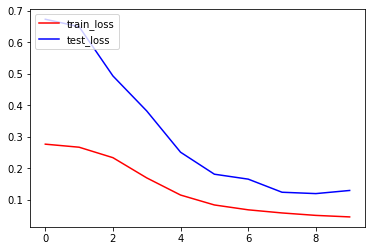

In [ ]:
plt.plot(model.history.history["loss"], c="r", label="train_loss")
plt.plot(model.history.history["val_loss"], c="b", label="test_loss")
plt.legend(loc="upper left")
plt.show()

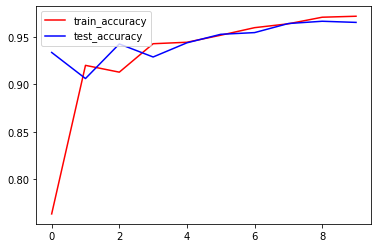

In [ ]:
plt.plot(model.history.history["accuracy"], c="r", label="train_accuracy")
plt.plot(model.history.history["val_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

In [ ]:
model = Sequential([
  Embedding(vocab_size+1, embedding_dim, input_shape=[txt.shape[1],], name="embedding"), # the embedding layer
  # the input dim needs to be equal to the size of the vocabulary + 1 (because of
  # the zero padding)
  GRU(units=64, return_sequences=True), # maintains the sequential nature
  GRU(units=32, return_sequences=False),  # returns the last output
  Dense(16, activation='relu'), # a dense layer
  Dense(8, activation='relu'), # a dense layer
  Dense(1, activation="sigmoid") # the prediction layer
])

In [ ]:
#pour le lstm, virer les sms trop longs
#==> la majorité n'a pas plus de 50 car, le plus long a 164 car